Arquivos extraídos: ['SolarPrediction.csv']
     UNIXTime                   Data      Time  Radiation  Temperature  \
0  1475229326  9/29/2016 12:00:00 AM  23:55:26       1.21           48   
1  1475229023  9/29/2016 12:00:00 AM  23:50:23       1.21           48   
2  1475228726  9/29/2016 12:00:00 AM  23:45:26       1.23           48   
3  1475228421  9/29/2016 12:00:00 AM  23:40:21       1.21           48   
4  1475228124  9/29/2016 12:00:00 AM  23:35:24       1.17           48   

   Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
0     30.46        59                  177.39   5.62    06:13:00   18:13:00  
1     30.46        58                  176.78   3.37    06:13:00   18:13:00  
2     30.46        57                  158.75   3.37    06:13:00   18:13:00  
3     30.46        60                  137.71   3.37    06:13:00   18:13:00  
4     30.46        62                  104.95   5.62    06:13:00   18:13:00  
                           RMSE           M

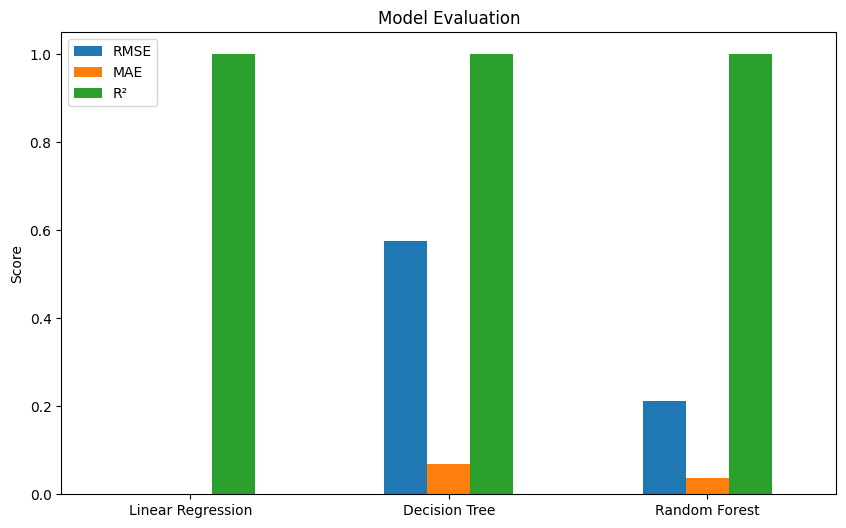

O melhor modelo é: Linear Regression com R² = 1.0


In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import zipfile
import os

# Etapa 1: Carregar e extrair o arquivo ZIP
zip_file_path = '/content/SolarPrediction.csv.zip'  # Caminho onde o arquivo foi carregado
extracted_folder_path = '/content/SolarPrediction_csv/'  # Pasta para extrair os arquivos

# Extrair o arquivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Listar os arquivos extraídos
extracted_files = os.listdir(extracted_folder_path)
print("Arquivos extraídos:", extracted_files)

# Etapa 2: Carregar o arquivo CSV
csv_file_path = os.path.join(extracted_folder_path, 'SolarPrediction.csv')  # Caminho completo do CSV
data = pd.read_csv(csv_file_path)

# Exibir as primeiras linhas do dataset
print(data.head())

# Etapa 3: Pré-processamento dos dados
# Remover a coluna 'Data' se ela não for relevante para a previsão
data.drop(columns=['Data'], inplace=True)

# Converter as variáveis de tempo para formato numérico (por exemplo, hora do dia)
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour

# Preencher valores nulos, mas apenas nas colunas numéricas
data.fillna(data.select_dtypes(include=[np.number]).mean(), inplace=True)

# Etapa 4: Selecionar as colunas relevantes para a previsão de consumo de energia
# Como não há uma coluna 'Consumption', vamos prever com as colunas disponíveis (Ex: Radiation, Temperature, etc.)
# Consideramos as colunas 'Radiation', 'Temperature', 'Pressure', etc., como variáveis preditoras.
X = data[['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Time']]

# Como o consumo de energia não está presente diretamente, vamos usar uma das colunas numéricas como o alvo (Ex: 'Radiation')
y = data['Radiation']  # Se você tiver outra coluna para prever, substitua 'Radiation' aqui

# Etapa 5: Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Etapa 6: Normalizar os dados (opcional, mas recomendável)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Etapa 7: Modelos a serem testados
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Etapa 8: Avaliar cada modelo
results = {}

for model_name, model in models.items():
    # Treinar o modelo
    model.fit(X_train, y_train)

    # Fazer previsões
    y_pred = model.predict(X_test)

    # Avaliar o modelo
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Armazenar os resultados
    results[model_name] = {'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Mostrar os resultados
results_df = pd.DataFrame(results).T
print(results_df)

# Etapa 9: Plotar os resultados (opcional)
results_df.plot(kind='bar', figsize=(10, 6), title='Model Evaluation')
plt.xticks(rotation=0)
plt.ylabel('Score')
plt.show()

# Etapa 10: Escolher o melhor modelo (com base em R² ou outras métricas)
best_model = max(results.items(), key=lambda x: x[1]['R²'])
print(f"O melhor modelo é: {best_model[0]} com R² = {best_model[1]['R²']}")
